In [ ]:
# Decision Trees are Noisy or Overfitting models

# Ensemble
#   1. Bagging - Bagging Trees and Random Forest
#   2. Boosting - AdaBoost and IGBoost
#   3. Stacking - Deep learing stuff


In [ ]:
# Bagging - 
    # 1. Bootstrap -
    # 2. Aggregate -

# Random Forest -
    # 1. Bootstrap - randomly sample columns
    # 2. Aggregate - same as bagging

# Boosting -
    # 1. Idea where you can combine [ weak learners] into a [strong learner] 
    # 2. weak learner - Decision Stump (Decision Tree with Depth 1)
    
           

In [ ]:
# exam - 10 questions, friends - 5
# 1st guy - 3 questions, rest 4 -> concentrate on rem 7
# 2nd guy - 2 questions, rest 3 -> rem 5
# 3rd guy - 4 questions, rest 2 -> rem 2
# 4th guy - 1 question, rest 1 -> rem 1
# 5th guy - 1 question, rest 1 -> rem 0


In [ ]:
# Pseudo code
# 1. Initialize weights of each data point uniformly (data size = N)
# 2. Loop over each Tree;
    # a. Sample with repetition the N data according to weights
    # b. Train current Tree with sampled data
    # c. Calculate Error for the Tree, Err = np.mean(actual != pred)  [actual, pred - numpy arrays]
    # d. Calculate Importance for the Tree, [Imp = 0.5*log((1 - Err + eps)/Err + eps)]. eps -> very small numbers
    # e. Update the weights
        # e.1, if predicted correct -> W = W*exp(-Imp)
        # e.2, if predicted correct -> W = W*exp(Imp)
# Imp = 0.5*log((1 - Err + eps)/Err + eps)
# Imp = 0.5*log(0.00001/1+0.000001) - log(1/large value) - .log(large value) -> very less importance

    # f. Normalize the weights - weights should between 0 and 1 for sampling
# 3. Multiply Importance with Predictions of each Tree

'''
def predict(X):
    final_pred = None
    for imp, tree for zip(importances, trees):
      predict1 = tree.predict(X)
      predict1 = imp*predict1
      if final_pred is None:
          final_pred = predict1
      else:
          final_pred += predict1
    return np.round(final_pred/len(trees))
'''    



'\ndef predict(X):\n    final_pred = None\n    for imp, tree for zip(importances, trees):\n      predict1 = tree.predict(X)\n      predict1 = imp*predict1\n      if final_pred is None:\n          final_pred = predict1\n      else:\n          final_pred += predict1\n    return np.round(final_pred/len(trees))\n'

In [ ]:
# Understanding Importance of Model
# Err = 1
# Imp = 0.5*log((1 - Err + eps)/Err + eps)
# Imp = 0.5*log(0.00001/1+0.000001) - log(1/large value) - .log(large value) -> very less importance

# Err = 0
# Imp = 0.5*log((1 - Err + eps)/Err + eps)
# Imp = 0.5*log(1.0000001/1+0.000001) - log(1/large value) -> very high importance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/sample_data/mnist_train_small.csv" , header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.isnull().sum().any()

False

In [ ]:
data.shape

(20000, 785)

In [ ]:
X = data.iloc[:, 1:].values 
Y = data.iloc[:, 0].values 

X.shape, Y.shape

((20000, 784), (20000,))

1


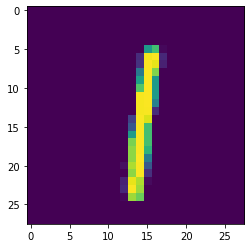

2


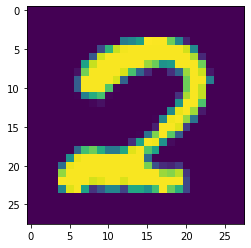

1


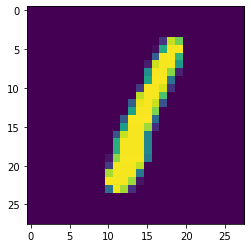

2


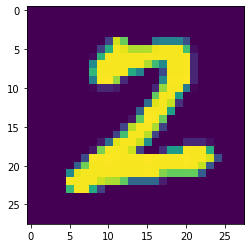

3


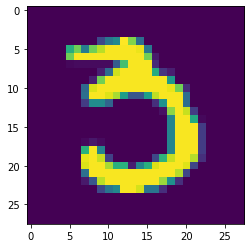

6


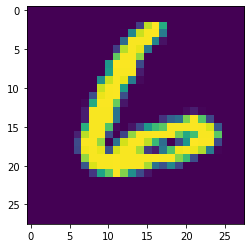

9


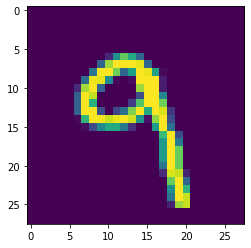

0


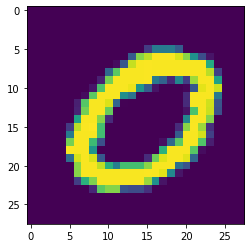

3


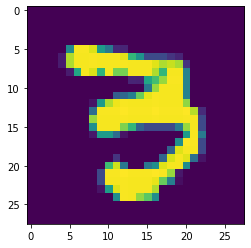

4


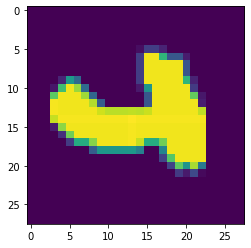

In [ ]:
for i in range(10):
  rand_idx = np.random.choice(X.shape[0])
  print(Y[rand_idx])
  plt.imshow(X[rand_idx].reshape(28, 28))
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

print(X.shape)

(20000, 784)


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 4)
Xtrain.shape, Ytrain.shape

((16000, 784), (16000,))

In [ ]:
Xtest.shape, Ytest.shape

((4000, 784), (4000,))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth= 3)

In [ ]:
model = AdaBoostClassifier(base_estimator = base_estimator, n_estimators = 100)
%time model.fit(Xtrain, Ytrain)

CPU times: user 2min 3s, sys: 212 ms, total: 2min 3s
Wall time: 2min 2s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100)

In [ ]:
model.score(Xtest, Ytest)

0.76025

In [ ]:
model.score(Xtest, Ytest)

0.76025

In [ ]:
import xgboost as xgb

In [ ]:
# dtrain = xgb.DMatrix(Xtrain, label=Ytrain)
# dtest = xgb.DMatrix(Xtest, label=Ytest)

In [ ]:
model = xgb.XGBClassifier() # tree = depth 4,

In [ ]:
%time model.fit(Xtrain, Ytrain)

CPU times: user 4min 29s, sys: 578 ms, total: 4min 30s
Wall time: 4min 31s


XGBClassifier(objective='multi:softprob')

In [ ]:
model.score(Xtest, Ytest)

0.93475